# Chest X-Ray Prediction

# <ins>Summary</ins>
### Busines and Data Understanding
This notebook will explore chest x-rays with the intent to try and predict whether a patient has pneumonia or not. The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). The folders that have been provided have close to 6,000 images from pediatric patients ages one through five. The source of the data is the Guangzhou Women and Children’s Medical Center. 
### Data Preparation
The first step in preparing the data was performing image augmentation. This was done by expanding the size of the dataset and by creating a modified version of the existing training set images. This in turn helped to increase dataset variation and ultimately improve the ability of the model to predict new images. As well as scaling the images some of them weren’t lined up properly so they had to be straightened out. Since we were predicting whether someone had pneumonia or not the images with bacterial and viral pneumonia were consolidated into one category. The libraries that were used for data preparation were:
1.	matplotlib.pyplot for data visualization
2.	numpy for handling different arrays
3.	pandas to handle the data       
4.	ImageDataGenerator from the tensorflow.keras.processing.image library that randomly applied defined parameters to the train set.
 - Keras and Tensorflow provide high-level APIs used for easily building and training models.

### Modeling
I chose a convolutional neural network (CNN) model for this data set. The idea behind that was that a local understanding of an image is good enough. The practical benefit is that having fewer parameters greatly improves the time it takes to learn as well as reduces the amount of data required to train the model. The libraries and imports I used were:
1.	From the tensorflow.keras.models library Sequential is imported for CNN modeling.
2.	To build the CNN architecture this notebook used tensorflow.keras.layers library which included:
 - Dense – operates on the input and returns the output.
 - Conv2D – 2D convolution layer.
 - Maxpoolin2D – down samples the input along its spatial dimensions.

In terms of tuning steps I chose to use EarlyStopping to help avoid overfitting the model. I also assigned weight classes because it emphasizes the weight of the minority class in order for the model to learn from all classes equally.

### Evaluation
The final model upon inspection performed pretty well. The way it was evaluated was with a precision score. A prescision score in this instance was predicting pneumonia and the person actually having pneumonia or predictiing normal lungs and the lungs were normal. The actual score for predicting pneumonia was an 82%. In terms of predicting healthy lungs it performed at a 90% clip. This is a good start. The validation approach I used for the model was to take a random sample from the internet and predict healthy or pneumonia lungs. It predicted, with about an 83% certainty, that the lungs were normal and they were.

# Business Understanding/Stakeholders
During this project I am trying to predict, with a higher certainty, whether a person has pneumonia or not. This project is important to a few different groups of people. The first group is filled with people whom have preexisting lung conditions that make them susceptible to pneumonia. The next group is filled with people from the medical community. Specifically, x-ray technicians because they are the ones reading the results and have to be as precise as possible. Pneumonia is increasing in the population and discovering the disease earlier will provide doctors with the right knowledge on how to treat it.

## Initial Data Exploration/Preparation
- The data comes from chest X-ray images (anterior-posterior) that were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou.
- This data is composed of three different pieces:
 1. Train set
 2. Test set
 3. Validation set
- A limitation to the data set as a whole is that the images are from a very specific age range. This might create some issues with the data.
- Importing relevant libraries to operate on the data.
- Defining the directories for the data.
- Creating a function to help visualize our model results. 

In [2]:
# Some basic imports to start out.
# There may be more imports along the way depending on how the data is explored.
# For Visualization
import matplotlib.pyplot as plt 
# For handling different arrays.
import numpy as np   
# For handling the data.
import pandas as pd             

In [3]:
#Define Directories for train, test & Validation Set
train_path = 'chest_xray/train/'
test_path = 'chest_xray/test/'
valid_path = 'chest_xray/val/'

In [4]:
# Defining results from a visualization function.
def visualize_training_results(history):
    '''
    From https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
    
    Input: keras history object (output from trained model)
    '''
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    fig.suptitle('Model Results')

    # summarize history for accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_ylabel('Accuracy')
    ax1.legend(['train', 'test'], loc='upper left')
    # summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'test'], loc='upper left')
    
    plt.xlabel('Epoch')
    plt.show()

## Parameters
- The batch refers to the number of training examples utilized in one iteration.
- The dimension of the images we are going to define are 500x500.
- The dimension size of 500 or more with a batch size greater than 16 may result in a crash as the RAM gets completely used in such cases. 
- A lower dimension size with greater batch size is one of the options to try.

In [5]:
# Define some often used standard parameters
batch_size = 16 
img_width = 500
img_height = 500

## Creating an Image Data Generator
- We will increase the size of the image training dataset artificially by performing an Image Augmentation technique. Image Augmentation expands the size of the dataset by creating a modified version of the existing training set images that helps to increase dataset variation and ultimately improve the ability of the model to predict new images.
- The image generator is for:
 1. Train set
 2. Test set

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

test_data_gen = ImageDataGenerator(rescale = 1./255)

## Loading up the Images
- The Image Data Generator has a class known as flow from the directory which reads the images from the folders containing the images.
- This will return the DirectoryIterator typetensorflow.python.keras.preprocessing.image.DirectoryIterator.
- Code for images can be found <a href="https://www.kaggle.com/sanwal092/intro-to-cnn-using-keras-to-predict-pneumonia">here.</a>

In [7]:
train = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size
      )
# Shuffle is set to as False so we can later compare it with predicted values without having indexing problem.
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      shuffle=False,  
      class_mode='binary',
      batch_size=batch_size
      )
valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary', 
      batch_size=batch_size
      )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## Images
- This is a simple preview of some of the train set images obtained from using Data Augmentation.

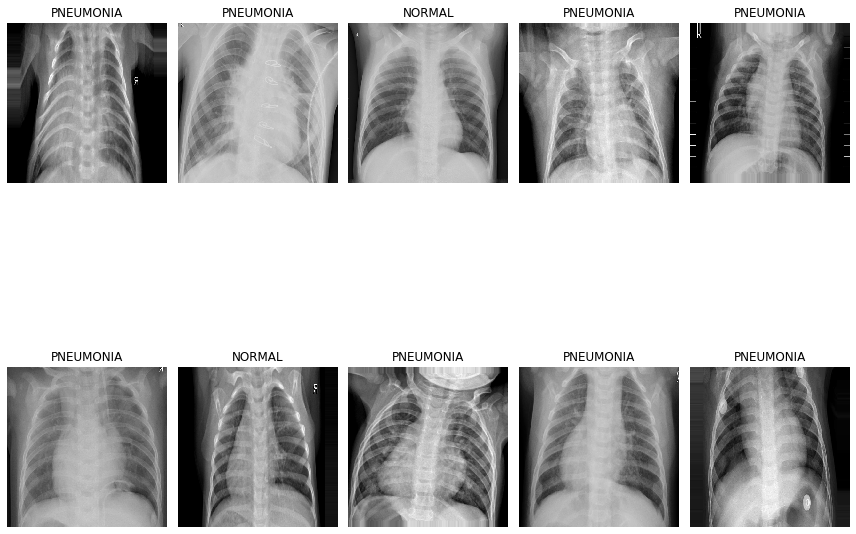

In [8]:
plt.figure(figsize=(12, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:'NORMAL', 1:'PNEUMONIA'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

In [9]:
# Imports that will allow a CNN architecture to be created.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

## CNN
- CNN architecture is based on layers of convolution. 
- The convolution layers receive input and transform the data from the image and pass it as input to the next layer. 
- The transformation is known as the operation of convolution.
- It is necessary to define the number of filters for each convolution layer. 
- These filters detect patterns such as edges, shapes, curves, objects, textures, or even colors. 
- The more sophisticated patterns or objects it detects are more deeply layered.

## Initial Baseline Model
- Just exploring the data.
- Seeing what an initial model spits out.
- Tried out a few initializers just to see what would happen.
- Initializers:
 1. Zeros - Generates 0 for all input data.
 2. TruncatedNormal - Generates value using truncated normal distribution of input data. The truncated normal distribution is the probability distribution derived from that of a normally distributed random variable by bounding the random variable from either below or above.

In [1]:
from keras.models import Sequential 
from keras.layers import Activation, Dense 
from keras import initializers 

my_init1 = initializers.TruncatedNormal(mean = 0.0, stddev = 0.05, seed = None)

In [239]:
# my_init = initializers.Zeros()
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(activation = 'relu', units = 128))#, kernel_initializer = my_init))
model.add(Dense(activation = 'relu', units = 64, kernel_initializer = my_init1))
model.add(Dense(activation = 'relu', units = 32))
model.add(Dense(activation = 'sigmoid', units = 1))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [240]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 498, 498, 32)      320       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 249, 249, 32)      0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 1984032)           0         
_________________________________________________________________
dense_73 (Dense)             (None, 128)               253956224 
_________________________________________________________________
dense_74 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_75 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_76 (Dense)             (None, 1)               

In [241]:
model1 = model.fit_generator(train,
                         steps_per_epoch = 150,
                         epochs = 10,
                         validation_data = valid,
                         validation_steps = 624)

Epoch 1/10
150/150 [==============================] - 193s 1s/step - loss: 1.1551 - accuracy: 0.8042 - val_loss: 0.5976 - val_accuracy: 0.6250
Epoch 2/10
150/150 [==============================] - 183s 1s/step - loss: 0.2311 - accuracy: 0.9104
Epoch 3/10
150/150 [==============================] - 1884s 13s/step - loss: 0.2063 - accuracy: 0.9121
Epoch 4/10
150/150 [==============================] - 185s 1s/step - loss: 0.2281 - accuracy: 0.9104
Epoch 5/10
150/150 [==============================] - 557s 4s/step - loss: 0.1923 - accuracy: 0.9258
Epoch 6/10
150/150 [==============================] - 874s 6s/step - loss: 0.2019 - accuracy: 0.9225
Epoch 7/10
150/150 [==============================] - 181s 1s/step - loss: 0.1791 - accuracy: 0.9296
Epoch 8/10
150/150 [==============================] - 198s 1s/step - loss: 0.2052 - accuracy: 0.9183
Epoch 9/10
150/150 [==============================] - 375s 2s/step - loss: 0.2067 - accuracy: 0.9150
Epoch 10/10
150/150 [==========================

In [242]:
test_a = model.evaluate(test)
print('The testing accuracy is :',test_a[1]*100, '%')

39/39 [==============================] - 9s 225ms/step - loss: 0.5829 - accuracy: 0.8157
The testing accuracy is : 81.57051205635071 %


In [243]:
preds1 = model.predict(test,verbose=1)

39/39 [==============================] - 9s 238ms/step


In [245]:
prediction = preds1.copy()
prediction[prediction <= 0.5] = 0
prediction[prediction > 0.5] = 1

<AxesSubplot:>

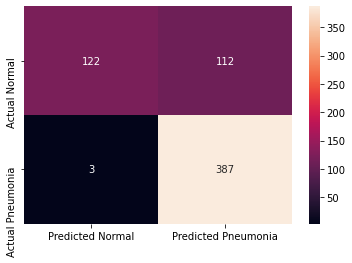

In [246]:
from sklearn.metrics import classification_report,confusion_matrix
cm1 = pd.DataFrame(data=confusion_matrix(test.classes, prediction, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm1,annot=True, fmt="d")

In [247]:
print(classification_report(y_true=test.classes,y_pred=prediction,target_names =['NORMAL','PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.98      0.52      0.68       234
   PNEUMONIA       0.78      0.99      0.87       390

    accuracy                           0.82       624
   macro avg       0.88      0.76      0.78       624
weighted avg       0.85      0.82      0.80       624



### Important things to think about before starting to build a CNN model:
1. Always begin with a lower filter value such as 32 and begin to increase it layer wise. The patterns get nore conplex so more filters are needed to capture as many combinations as possible.
2. Construct the model with a layer of Conv2D followed by a layer of MaxPooling.
3. The kernel_size is a preferred odd number like 3x3.
4. Tanh, relu, etc. can be used for an activation function, but relu is the most preferred choice.
5. (input_shape) takes three arguments, the images width & height and dimension as color channel.
6. Flatten the input after the CNN layers and then add ANN layers.
7. Use the activation function as softmax for the last layer. If the problem is more than 2 classes, define units as the total number of classes and use sigmoid for binary classification and set unit to 1.

In [72]:
cnn = Sequential()
# Starting out with a lower filter of 32.
# Max Pooling simply says to the Convolutional Neural Network that we will carry forward only that information,
# if that is the largest information available amplitude.
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
# Increasing the filter to 64.
cnn.add(Conv2D(64, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
# Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. 
# We flatten the output of the convolutional layers to create a single long feature vector.
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'sigmoid', units = 1))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## CNN Summary
- Now that we have developed the model let's see what is going on!

In [73]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 498, 498, 32)      320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 247, 247, 32)      9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 121, 121, 32)      9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 58, 58, 64)       

## Interpretation of the Model
- Plotting CNN architecture.

In [74]:
# Hyperparameters of Conv2D
Conv2D(filters=2, kernel_size=1,
    strides=(1, 1),
    padding="valid",
    activation=None,
    input_shape=(img_height, img_width, 3)
    )
# Hyperparameters of MaxPooling2D 
MaxPooling2D(
    pool_size=(2, 2), strides=None, padding="valid"
    )

## Visualizing the Model
- Link for code and model found <a href="https://towardsdatascience.com/medical-x-ray-%EF%B8%8F-image-classification-using-convolutional-neural-network-9a6d33b1c2a">in this blog.</a>

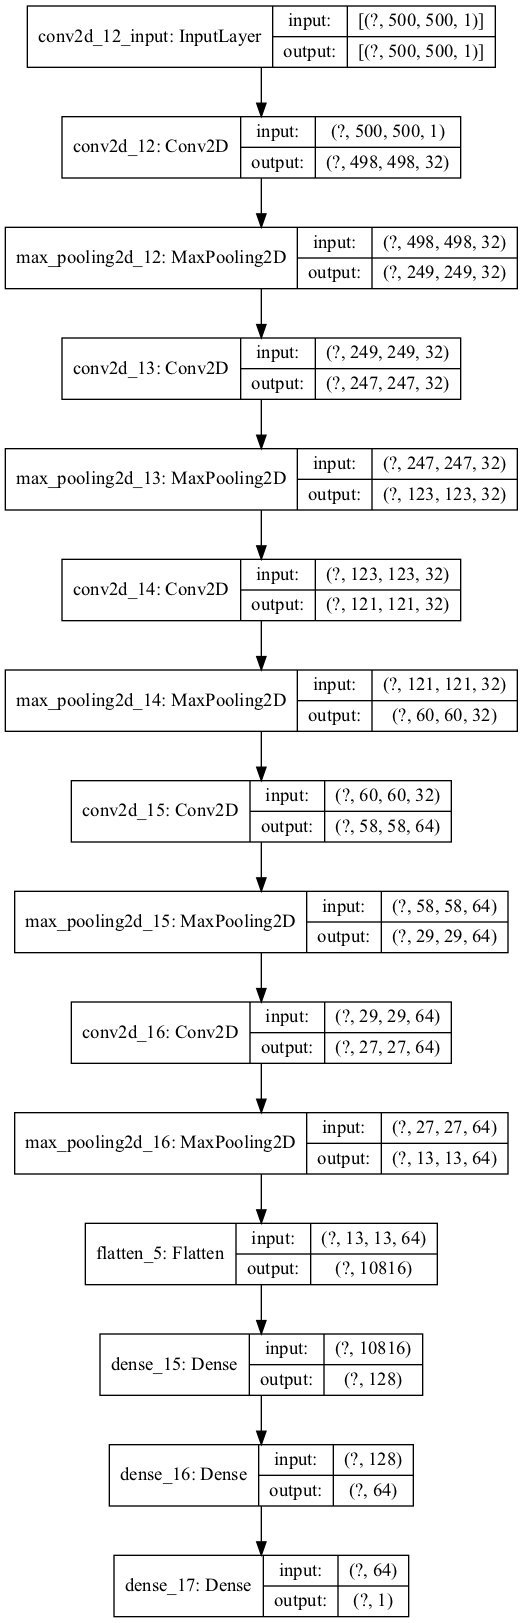

In [75]:
!pip install pydot
import graphviz
from tensorflow.keras.utils import plot_model
plot_model(cnn,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

## Fitting the Model
- EarlyStopping is called to stop the epochs based on some metric (monitor) and conditions (mode, patience). 
- It helps to avoid overfitting the model. 
- We are telling the model to stop based on val_loss metric, we need it to be a minimum. 
- (patience) says that after a minimum val_loss is achieved during the next iterations if the val_loss increases in any of the 3 iterations then the the training will stop at that epoch.

In [76]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

## Assigning Class Weights
- It is good practice to assign class weights. 
- It emphasizes the weight of the minority class in order for the model to learn from all classes equally.

In [77]:
train.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [78]:
train

In [79]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', classes=np.unique(train.classes), y=train.classes)
cw = dict(zip(np.unique(train.classes), weights))
print(cw)

{0: 1.9448173005219984, 1: 0.6730322580645162}


In [80]:
#cnn_model = cnn.fit(train, epochs=1, validation_data=valid, class_weight=cw, callbacks=callbacks_list)

In [81]:
#cnn_model = cnn.fit(train, epochs=1, validation_steps=20, validation_data=valid, class_weight=cw, callbacks=callbacks_list)

In [206]:
cnn_model = cnn.fit_generator(train,
                         steps_per_epoch = 100,
                         epochs = 10,
                         validation_data = valid,
                         validation_steps = 624,
                              class_weight=cw)

Epoch 1/10
100/100 [==============================] - 147s 1s/step - loss: 0.1807 - accuracy: 0.9181 - val_loss: 0.5699 - val_accuracy: 0.8125
Epoch 2/10
100/100 [==============================] - 149s 1s/step - loss: 0.2240 - accuracy: 0.9087
Epoch 3/10
100/100 [==============================] - 142s 1s/step - loss: 0.2258 - accuracy: 0.9119
Epoch 4/10
100/100 [==============================] - 142s 1s/step - loss: 0.2143 - accuracy: 0.9131
Epoch 5/10
100/100 [==============================] - 141s 1s/step - loss: 0.1828 - accuracy: 0.9325
Epoch 6/10
100/100 [==============================] - 144s 1s/step - loss: 0.1921 - accuracy: 0.9250
Epoch 7/10
100/100 [==============================] - 145s 1s/step - loss: 0.2084 - accuracy: 0.9175
Epoch 8/10
100/100 [==============================] - 146s 1s/step - loss: 0.1677 - accuracy: 0.9275
Epoch 9/10
100/100 [==============================] - 146s 1s/step - loss: 0.1800 - accuracy: 0.9287
Epoch 10/10
100/100 [============================

## Defining the Results of the Visualization Function

Test loss: 0.5063505172729492
Test accuracy: 0.8413461446762085


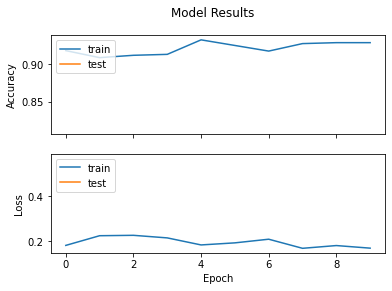

In [207]:
test_accu = cnn.evaluate_generator(test, 100)
#test_accu = cnn.evaluate(test_set, len(validation_generator), verbose=0)
print("Test loss:", test_accu[0])
print("Test accuracy:", test_accu[1])

visualize_training_results(cnn_model)

## Evaluate
- Find the models accuracy.
- Predicting the test dataset.
- Taking a peak at some of the performance measurement metrics in detail to evaluate our model.

In [208]:
test_accu = cnn.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

39/39 [==============================] - 13s 323ms/step - loss: 0.5064 - accuracy: 0.8413
The testing accuracy is : 84.13461446762085 %


In [209]:
preds = cnn.predict(test,verbose=1)

39/39 [==============================] - 13s 329ms/step


- The activation function of the last layer is sigmoid.
- This allows the model to give a prediction in the 0 to 1 range and not an exact classification as 0 or 1. 
- So we categorize all the values in the 0.5 to 1 range as 0 and less than 0.5 as 1. 
- Note: 0 denotes a normal case and 1 denotes a case of pneumonia.

In [210]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

## Confusion Matrix
- The upper left (true positive) denotes the number of images correctly predicted as normal cases.
- The bottom right (true negative) denotes the correctly predicted number of images as cases of pneumonia. 
- The upper right denotes the number of incorrectly predicted images but were actually normal cases.
- The lower left denotes the number of incorrectly predicted images that were actually pneumonia cases.

<AxesSubplot:>

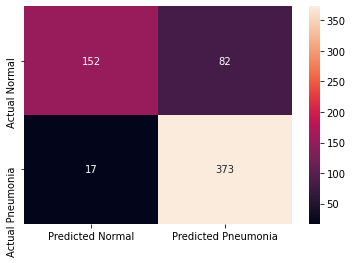

In [211]:
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True, fmt="d")

## Classification Report
- Precision = TruePositives / (TruePositives + FalsePositives)
 - The precision score explains how precise/accurate your model is out of those predicted positive. Meaning, how many of them are actually positive.
- Recall = TruePositives / (TruePositives + FalseNegatives)
 - Recall calculates how many of the actual positives our model captured through labeling them as positive (true positive).
- F1 = (2 * Precision * Recall) / (Precision + Recall)
 - F1 Score can be a better measure to use if we need to seek a balance between precision and recall. Especially if there is an uneven class distribution (large number of actual negatives).

In [212]:
print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.90      0.65      0.75       234
   PNEUMONIA       0.82      0.96      0.88       390

    accuracy                           0.84       624
   macro avg       0.86      0.80      0.82       624
weighted avg       0.85      0.84      0.83       624



## Visualizing Some of the Predicted Values
- Code for imaging can be found <a href="https://towardsdatascience.com/medical-x-ray-%EF%B8%8F-image-classification-using-convolutional-neural-network-9a6d33b1c2a">here.</a>

In [213]:
# This code extracts the images from the test data iterator without shuffling the sequence.
# x contains image array and y has labels 
test.reset()
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
print(x.shape)
print(y.shape)

(624, 500, 500, 1)
(624,)


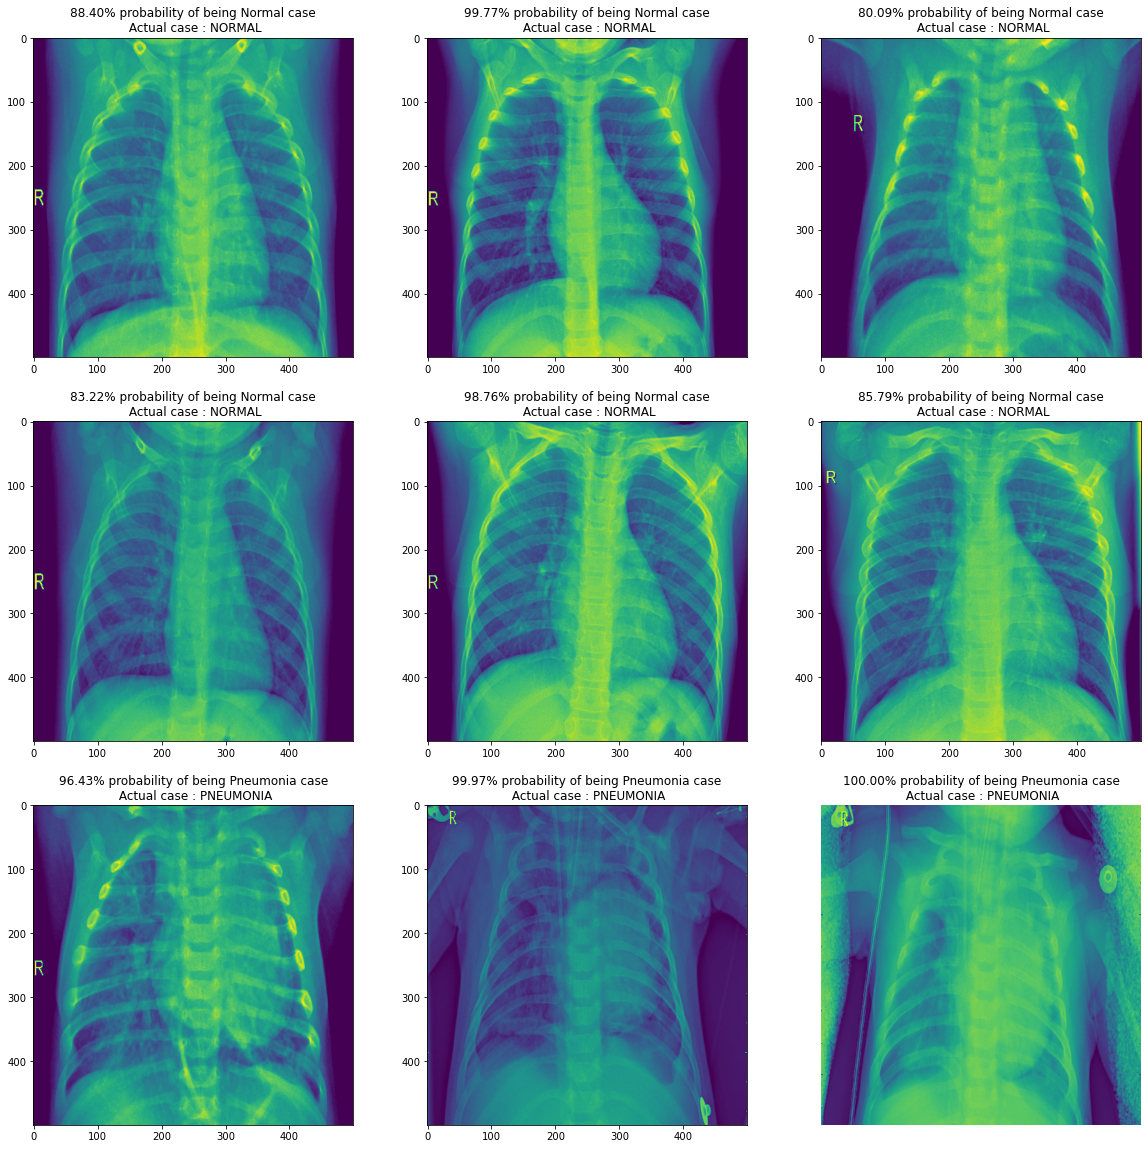

In [214]:
dic = {0:'NORMAL', 1:'PNEUMONIA'}
plt.figure(figsize=(20,20))
for i in range(0+228, 9+228):
    plt.subplot(3, 3, (i-228)+1)
    if preds[i, 0] >= 0.5: 
        out = ('{:.2%} probability of being Pneumonia case'.format(preds[i][0]))
    else: 
        out = ('{:.2%} probability of being Normal case'.format(1-preds[i][0]))
    plt.title(out+"\n Actual case : "+ dic.get(y[i]))    
    plt.imshow(np.squeeze(x[i]))
plt.axis('off')
plt.show()

## Testing on a Random Sample (for fun)
- Picking a random image out (just googled chest x-ray).
- Processing the image.
- Predicting from the random image obtained.
- Visualizing the random sample.

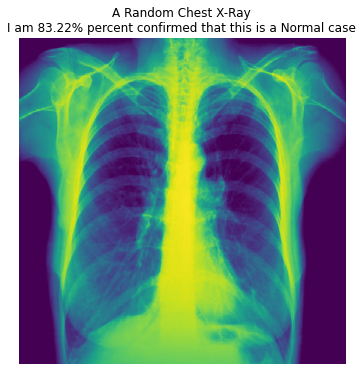

In [215]:
# Testing a random Chest X-Ray from the internet.
random_path = 'chest_xray/X-Ray-Chest-random-32202353-500-400.jpg'
from tensorflow.keras.preprocessing import image
random_img = image.load_img(random_path, target_size=(500, 500), color_mode='grayscale')

# Preprocessing the image.
pp_random_img = image.img_to_array(random_img)
pp_random_img = pp_random_img/255
pp_random_img = np.expand_dims(pp_random_img, axis=0)

# Predicting the accuracy of the random chest x-ray.
random_preds= cnn.predict(pp_random_img)

# Visualize the random sample.
plt.figure(figsize=(6,6))
plt.axis('off')
if random_preds>= 0.5: 
    out = ('I am {:.2%} percent confirmed that this is a Pneumonia case'.format(random_preds[0][0]))
    
else: 
    out = ('I am {:.2%} percent confirmed that this is a Normal case'.format(1-random_preds[0][0]))
plt.title("A Random Chest X-Ray\n"+out)  
plt.imshow(np.squeeze(pp_random_img))
plt.show()

## Conclusion
Based on the model and all of the tuning I obtained precision scores of 82% for predicting pneumonia and 90% for predicting healthy lungs. This was corroborated by examining a random sample from the internet. This sample was tested and had an 83.22% chance of being noraml and they were. A reduction in false negatives was also achieved by tuning the parameters. This is good because we don't want to tell someone they are healthy when they are not.
### Going Forward
In terms of what could be done to make this even better I would start by tuning the parameters a little more. I would also try adding more relevant data to the source. This will allow for even more accurate predictions going forward.